In [8]:
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState
from keras.datasets import mnist
from keras.utils import np_utils

In [9]:
(train_feature, train_label),\
(test_feature, test_label) = mnist.load_data()  

In [10]:
train_feature_vector =train_feature.reshape(len(train_feature), 784).astype('float32')
test_feature_vector = test_feature.reshape(len( test_feature), 784).astype('float32')

In [11]:
n_row, n_col = 10, 6 #设置图像展示时的排列情况
n_components = n_row * n_col #设置提取的特征的数目
image_shape = (28, 28) #设置人脸数据图片的大小
img = train_feature_vector #加载数据，并打乱顺序

In [12]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row)) 
    plt.suptitle(title, size=16)

    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())

        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest', vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.94, 0.04, 0.)

In [13]:
estimators = [
    ('Eigenfaces - PCA using randomized SVD',
         decomposition.PCA(n_components=60,whiten=True)),

    ('Non-negative components - NMF',
         decomposition.NMF(n_components=60, init='nndsvda', tol=5e-3))
]

Extracting the top 60 Eigenfaces - PCA using randomized SVD...
(60000, 784)
Extracting the top 60 Non-negative components - NMF...
(60000, 784)


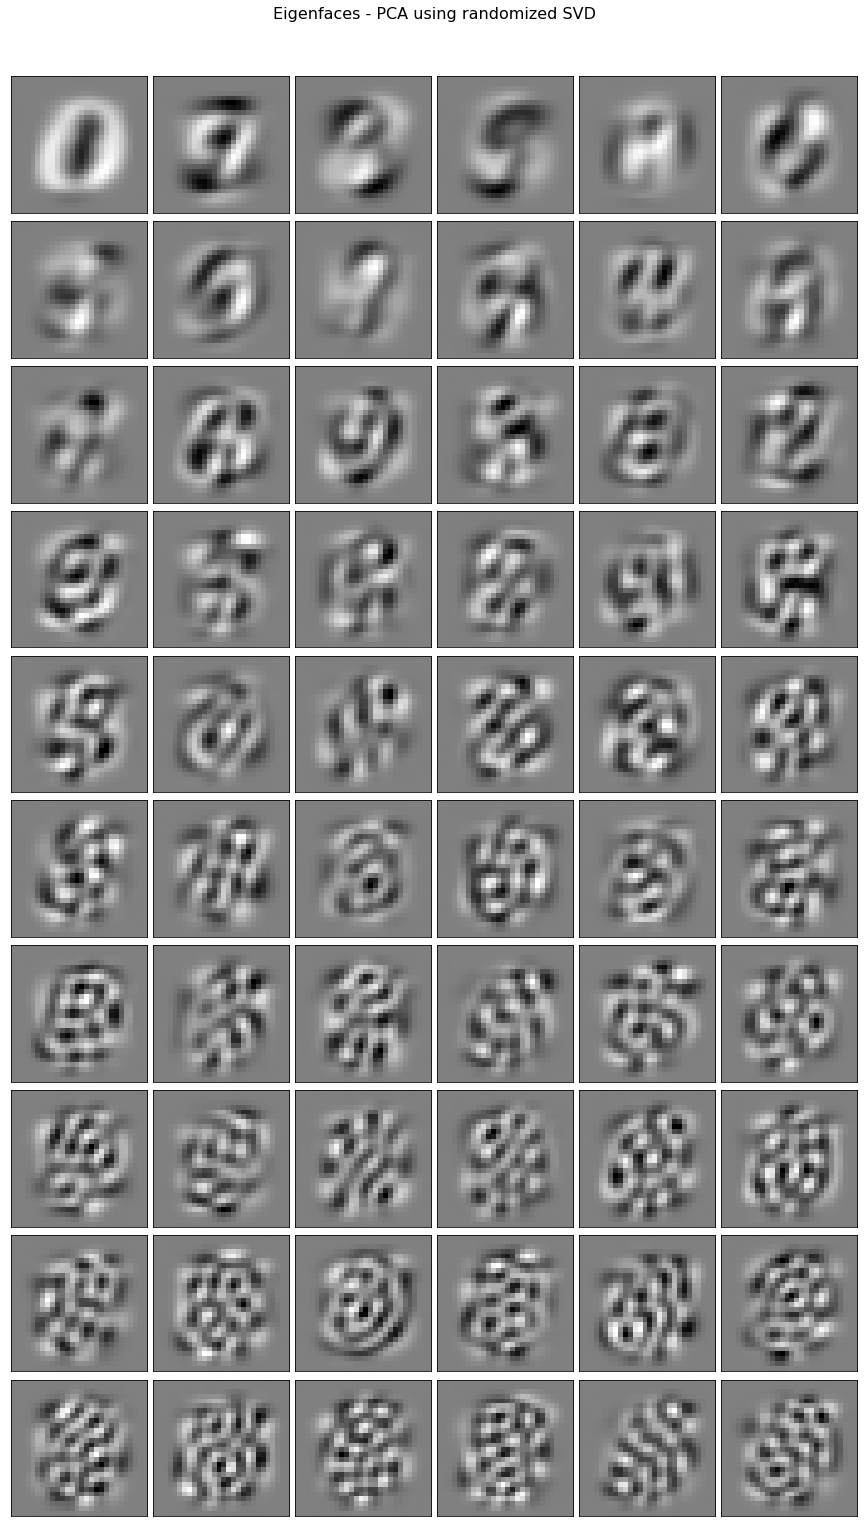

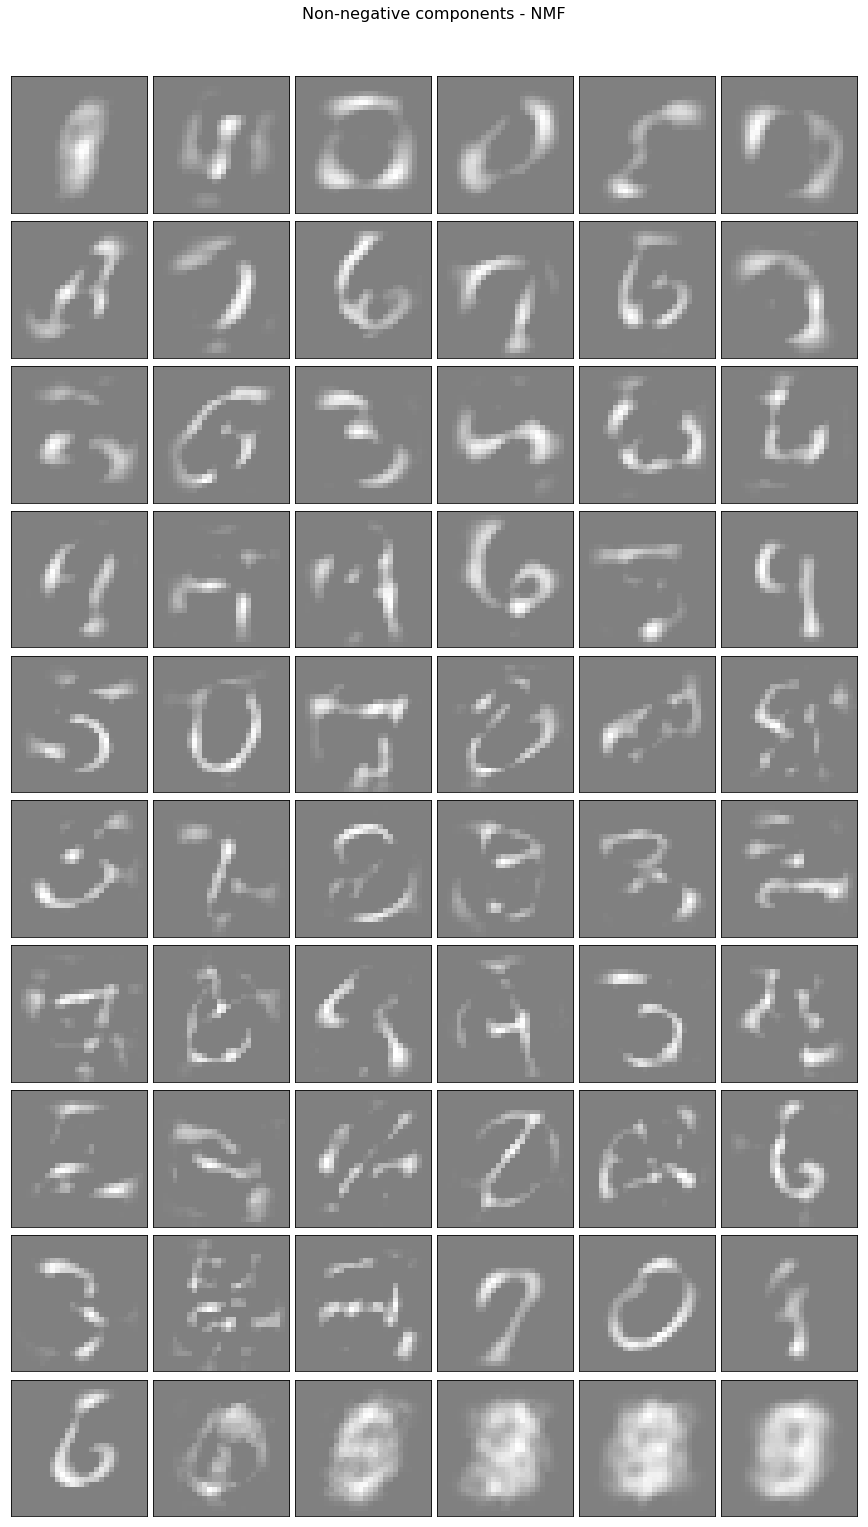

In [14]:
for name, estimator in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    print(img.shape)
    estimator.fit(img)
    components_ = estimator.components_
    plot_gallery(name, components_[:n_components])

plt.show()